In [39]:
try:
  import yfinance
except ImportError:
    !pip install yfinance

In [40]:
try:
  import sklearn
except ImportError:
    !pip install sklearn

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU


In [42]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3322412578627308501
xla_global_id: -1
]


In [43]:

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")


No GPU found


In [44]:
#Cargar los datos
company = '^MXX'
ticker = yf.Ticker(company)
hist = ticker.history(start = '2000-1-1', end='2024-4-10')

print(hist.head())  # Muestra las primeras filas del DataFrame


                                  Open         High          Low        Close  \
Date                                                                            
2000-01-03 00:00:00-06:00  7185.709961  7278.770020  7059.450195  7077.709961   
2000-01-04 00:00:00-06:00  7074.709961  7074.709961  6673.359863  6675.270020   
2000-01-05 00:00:00-06:00  6674.930176  6781.029785  6524.279785  6764.310059   
2000-01-06 00:00:00-06:00  6784.000000  6822.459961  6742.910156  6751.649902   
2000-01-07 00:00:00-06:00  6768.859863  7054.290039  6768.859863  7047.089844   

                           Volume  Dividends  Stock Splits  
Date                                                        
2000-01-03 00:00:00-06:00       0        0.0           0.0  
2000-01-04 00:00:00-06:00       0        0.0           0.0  
2000-01-05 00:00:00-06:00       0        0.0           0.0  
2000-01-06 00:00:00-06:00       0        0.0           0.0  
2000-01-07 00:00:00-06:00       0        0.0           0.0  


In [45]:

print(hist.info())  # Muestra información sobre las columnas y tipos de datos
print(hist.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6091 entries, 2000-01-03 00:00:00-06:00 to 2024-04-09 00:00:00-06:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6091 non-null   float64
 1   High          6091 non-null   float64
 2   Low           6091 non-null   float64
 3   Close         6091 non-null   float64
 4   Volume        6091 non-null   int64  
 5   Dividends     6091 non-null   float64
 6   Stock Splits  6091 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 380.7 KB
None
               Open          High           Low         Close        Volume  \
count   6091.000000   6091.000000   6091.000000   6091.000000  6.091000e+03   
mean   32250.175359  32466.957851  32028.613715  32254.530208  1.514046e+08   
std    16030.650912  16111.667711  15940.868315  16027.989720  1.046400e+08   
min     5077.390137   5109.399902   4950.709961   5081.919922  0.000000e+00   
25%    

In [46]:
print(hist.iloc[4871])

Open            4.341796e+04
High            4.348511e+04
Low             4.285011e+04
Close           4.314783e+04
Volume          1.183901e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2019-06-06 00:00:00-05:00, dtype: float64


In [47]:
#Preparar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1))

prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(6061, 30, 1)

In [48]:
print(x_train[0,:,:])
print(y_train[0])
print(scaled_data[0:61])

[[0.03721409]
 [0.02971008]
 [0.03137035]
 [0.03113428]
 [0.03664314]
 [0.04198736]
 [0.03843393]
 [0.03901141]
 [0.04088387]
 [0.04287847]
 [0.04410223]
 [0.04142088]
 [0.03895734]
 [0.03645109]
 [0.03372854]
 [0.03306791]
 [0.03363717]
 [0.03425362]
 [0.03305001]
 [0.02921054]
 [0.02803937]
 [0.03092675]
 [0.0314729 ]
 [0.03656875]
 [0.04017569]
 [0.04681432]
 [0.04664539]
 [0.04451319]
 [0.0492624 ]
 [0.0473905 ]]
0.046174012925307206
[[0.03721409]
 [0.02971008]
 [0.03137035]
 [0.03113428]
 [0.03664314]
 [0.04198736]
 [0.03843393]
 [0.03901141]
 [0.04088387]
 [0.04287847]
 [0.04410223]
 [0.04142088]
 [0.03895734]
 [0.03645109]
 [0.03372854]
 [0.03306791]
 [0.03363717]
 [0.03425362]
 [0.03305001]
 [0.02921054]
 [0.02803937]
 [0.03092675]
 [0.0314729 ]
 [0.03656875]
 [0.04017569]
 [0.04681432]
 [0.04664539]
 [0.04451319]
 [0.0492624 ]
 [0.0473905 ]
 [0.04617401]
 [0.04648   ]
 [0.0469663 ]
 [0.04580034]
 [0.04220869]
 [0.04163812]
 [0.04014249]
 [0.04438192]
 [0.04342536]
 [0.04144009

In [49]:
#Construir el modelo
model = Sequential()

model.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrena el modelo
history = model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25


c:\Users\Sergio Nava\anaconda3\envs\py311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0416
Epoch 2/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0022
Epoch 3/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0017
Epoch 4/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0015
Epoch 5/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0017
Epoch 6/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0015
Epoch 7/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0013
Epoch 8/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0013
Epoch 9/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0012
Epoch 10/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0011
Epoch 11/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0011
Epoch 12/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0011
Epoch 13/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 9.6790e-04
Epoch 14/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 9.7795e-04
Epoch 15/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 25

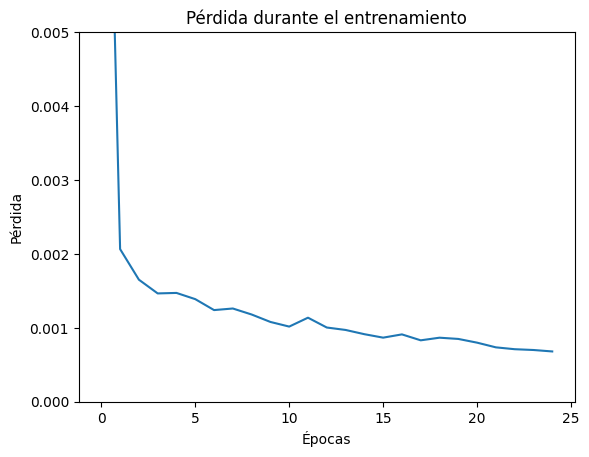

In [50]:
# model.fit(x_train, y_train, epochs=25, batch_size=32, verbose=0)

# Extrae la pérdida (loss) y la precisión (accuracy) de cada época
loss = history.history['loss']

# Importa la biblioteca matplotlib para crear la gráfica
import matplotlib.pyplot as plt

# Crea la gráfica de pérdida
plt.plot(loss)
plt.ylim(0, .005)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

In [51]:
#Cargar los datos del test
hist_test = ticker.history(start = '2000-1-1', end='2024-3-15')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((hist['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))

In [52]:
x_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


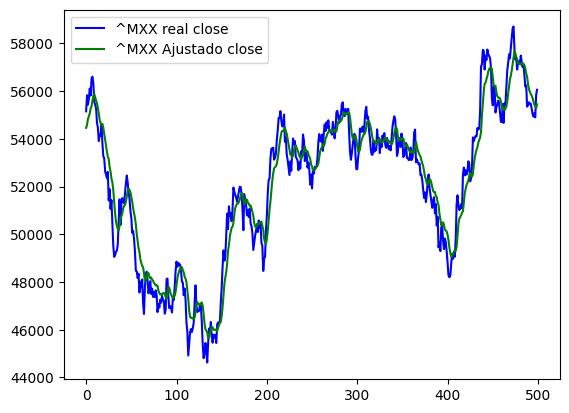

In [53]:
plt.plot(actual_prices[-500:],color="blue",label=f"{company} real close")
plt.plot(predicted_prices[-500:],color="green",label=f"{company} Ajustado close")
plt.legend()
plt.show()

In [54]:
rentability = 1
for i in range(1,len(actual_prices)):
  if predicted_prices[i] > actual_prices[i-1]:
    rentability*= actual_prices[i]/actual_prices[i-1]

print((rentability-1)*100,"%")

654.0425267270114 %


In [55]:
model.summary ()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 30, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 30, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_8 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,805 (452.37 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,204 (301.58 KB)

In [56]:
from graphviz import Digraph
dot = Digraph(comment='Neural Network')
dot.node('A', 'Retornos_IPC')
dot.node('B', 'Hidden Layer 1000'), dot.node('C', 'Hidden Layer 100'), dot.node('D', 'Hidden Layer 10')
dot.node('E', 'Valor_Retorno')
dot.edges(['AB', 'BC', 'CD', 'DE'])
dot.render('neural_network.gv', view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
dot = Digraph(comment='model')
dot.render('neural_network.gv', view=True)

In [ ]:
print(x_train.shape[1])

In [ ]:
predictions = model.predict(model)


ValueError: Unrecognized data type: x=<Sequential name=sequential_4, built=True> (of type <class 'keras.src.models.sequential.Sequential'>)